<a href="https://colab.research.google.com/github/mpedraza98/spotify_recommender/blob/main/code/Cluster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will analyze the clustering of our dataset, we will try to find an appropiate number of clusters and analyze any relevant aspects we can learn from them

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import euclidean
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
col_names = {9:'Danceability', 10:'Energy', 11:'Key', 12:'Loudness', 13: 'Mode', 
             14:'Speechiness', 15:'Acousticness', 16:'Instrumentalness', 17:'Liveness', 18:'Valence', 19:'Tempo'}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/MATH637_Final_Project/data_with_extra_features/

/content/drive/.shortcut-targets-by-id/1_fy5IRsWcSj09qqvWnrAXjoN6kMNYJtN/MATH637_Final_Project/data_with_extra_features


In [ ]:
!ls

playlist_10k.csv     slice_2_tracks.csv   slice_43_tracks.csv
README.txt	     slice_36_tracks.csv  slice_48_tracks.csv
slice_15_tracks.csv  slice_38_tracks.csv  slice_49_tracks.csv
slice_1_tracks.csv   slice_3_tracks.csv   slice_70_tracks.csv


In [ ]:
df = pd.read_csv('slice_1_tracks.csv', header = None)

In [ ]:
#clean up the dataset from tracks with problems when retrieving information
df.drop(df[df[9]==-999].index, inplace = True)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,10000,Magic,spotify:track:23khhseCLQqVMCIT1WMAns,Ghost Stories,spotify:album:2G4AUqfwxcV1UdQjm2ouYr,Coldplay,spotify:artist:4gzpq5DPGxSnKTe4SA8HAU,285014,0,0.738,0.482,6,-8.917,0,0.0402,0.02660,0.621000,0.1060,0.352,93.457
1,10000,A Sky Full of Stars,spotify:track:0FDzzruyVECATHXKHFs9eJ,Ghost Stories,spotify:album:2G4AUqfwxcV1UdQjm2ouYr,Coldplay,spotify:artist:4gzpq5DPGxSnKTe4SA8HAU,268466,1,0.545,0.675,6,-6.474,1,0.0279,0.00617,0.001970,0.2090,0.162,124.970
2,10000,Every Little Thing She Does Is Magic,spotify:track:5DnUFzGSrLiiAJRxKoiwFv,Symphonicities,spotify:album:1dpyonY9ev2z5a7rwfERZh,Sting,spotify:artist:0Ty63ceoRnnJKVEYP0VQpk,296826,2,0.432,0.358,2,-9.970,1,0.0309,0.81500,0.010300,0.1920,0.166,81.119
3,10000,I Wanna Be Your Lover - Single Version,spotify:track:4gi2ioQwGOBXTrXlBR9RfQ,The Hits 2,spotify:album:2E5Jr8tcyqKrGzGPmNA3il,Prince,spotify:artist:5a2EaR3hamoenG9rDuVn8j,180080,3,0.793,0.442,8,-11.293,0,0.0564,0.23600,0.001630,0.0662,0.833,115.995
4,10000,Raspberry Beret,spotify:track:5jSz894ljfWE0IcHBSM39i,Around The World In A Day,spotify:album:5FbrTPPlaNSOsChhKUZxcu,Prince,spotify:artist:5a2EaR3hamoenG9rDuVn8j,215173,4,0.761,0.670,2,-12.759,1,0.0438,0.21000,0.000426,0.0685,0.910,120.752


Let's split the data into train, test and validation datasets, 75% for training and 25% of it for testing. With the stratify option we make sure that every playlist has the same percentageof data in the train and testing datasets

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.25, random_state=1234, stratify = df[0])
#df_train, df_val = train_test_split(df_train, test_size=0.25, random_state=1234, stratify = df_train[0])

For the data preprocessing, we will scale the numerical features that are going to be used for the classification. In our dataset the numerical features span columns 9-19

In [ ]:
# create a list with the features to be used during clustering
cluster_features = np.arange(9,20)

In [ ]:
# Normalize our data, every column will have mean 0 and std 1
scaler = StandardScaler().fit_transform(df_train[cluster_features])
df_train_sc = df_train.copy()
df_train_sc[cluster_features] = scaler

In [ ]:
df_train_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
62464,10942,Piano Man,spotify:track:78WVLOP9pN0G3gRLFy1rAa,Piano Man,spotify:album:77ErLrVvYETIlQJHAwhfIH,Billy Joel,spotify:artist:6zFYqv1mOsgBRQbae3JJ9e,1.325474,-0.937482,-1.701024,-0.780043,-1.439194,-0.423486,0.719270,-0.678202,1.367625,-0.305335,0.808566,-0.358522,1.989151
27405,10421,Tho Freestyle,spotify:track:4qFixB6NCpNqdrtlPKpNQE,Droptopwop,spotify:album:0smWYh2nQsaZNonBGZpZMn,Gucci Mane,spotify:artist:13y7CgLHjMVRMDqxdx0Xdo,-0.962204,3.200773,0.866470,-0.694814,0.221834,-0.043798,-1.390299,0.957380,1.328295,-0.305357,1.797486,-0.729887,0.947574
30008,10469,Better Together,spotify:track:2iXdwVdzA0KrI2Q0iZNJbX,In Between Dreams,spotify:album:2B9q4KPjOEYu885Keo9dfX,Jack Johnson,spotify:artist:3GBPw9NK25X1Wt2OUvOwY3,-0.345696,-1.099766,1.629276,-1.400326,-0.055004,-0.608000,0.719270,-0.431964,0.223499,-0.305309,-0.527457,0.701327,-0.397388
4881,10078,Lonely Boy,spotify:track:5G1sTBGbZT5o4PNRc75RKI,El Camino,spotify:album:5DLhV9yOvZ7IxVmljMXtNm,The Black Keys,spotify:artist:7mnBLXK823vNxN3UWB7Gfz,-0.528092,-0.694055,-1.564587,1.090274,-0.885518,-0.158606,0.719270,-0.273811,-0.827059,-0.254317,-0.581815,0.484350,1.542820
48239,10739,I'm the One,spotify:track:3DXncPQOG4VBw3QHh3S817,Grateful,spotify:album:4JBZ0QHveEpESepanNBG8A,DJ Khaled,spotify:artist:0QHgL1lAIqAw0HtD7YldmP,0.706522,-0.450628,0.004437,0.124338,0.498671,0.812619,0.719270,-0.587114,-0.644607,-0.305357,-0.141058,1.335567,-1.402228


We will use k-means clustering as a way of creating an extra feature. The idea is that songs with similar characteristics will be clustered together, and we could add the cluster label as a feature to make the recommendations

Let's use the elbow method and a silhouette plot to select the most adecuate number of clusters for our dataset. There is an important consideration, we will be using the entire dataset which contains repeated songs, we will try this way and also without repeating songs and compare the results

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

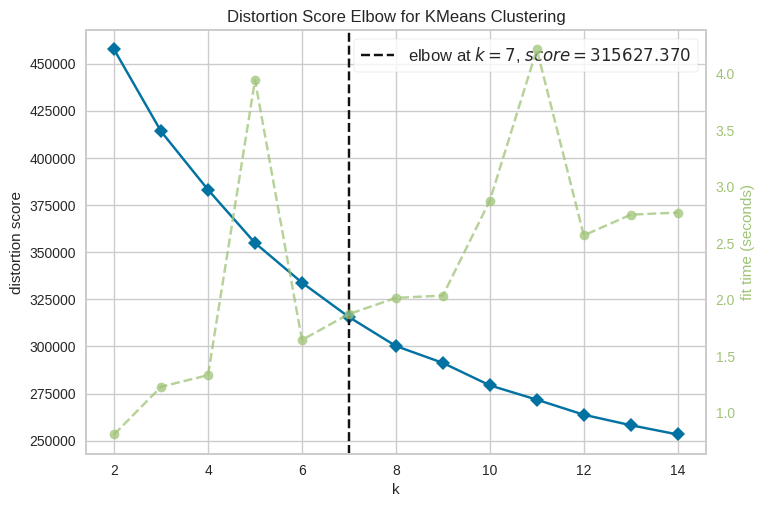

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Instantiate the clustering model and visualizer
km = KMeans(random_state=1234)
visualizer = KElbowVisualizer(km, k=(2,15))
 
visualizer.fit(df_train_sc[cluster_features])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

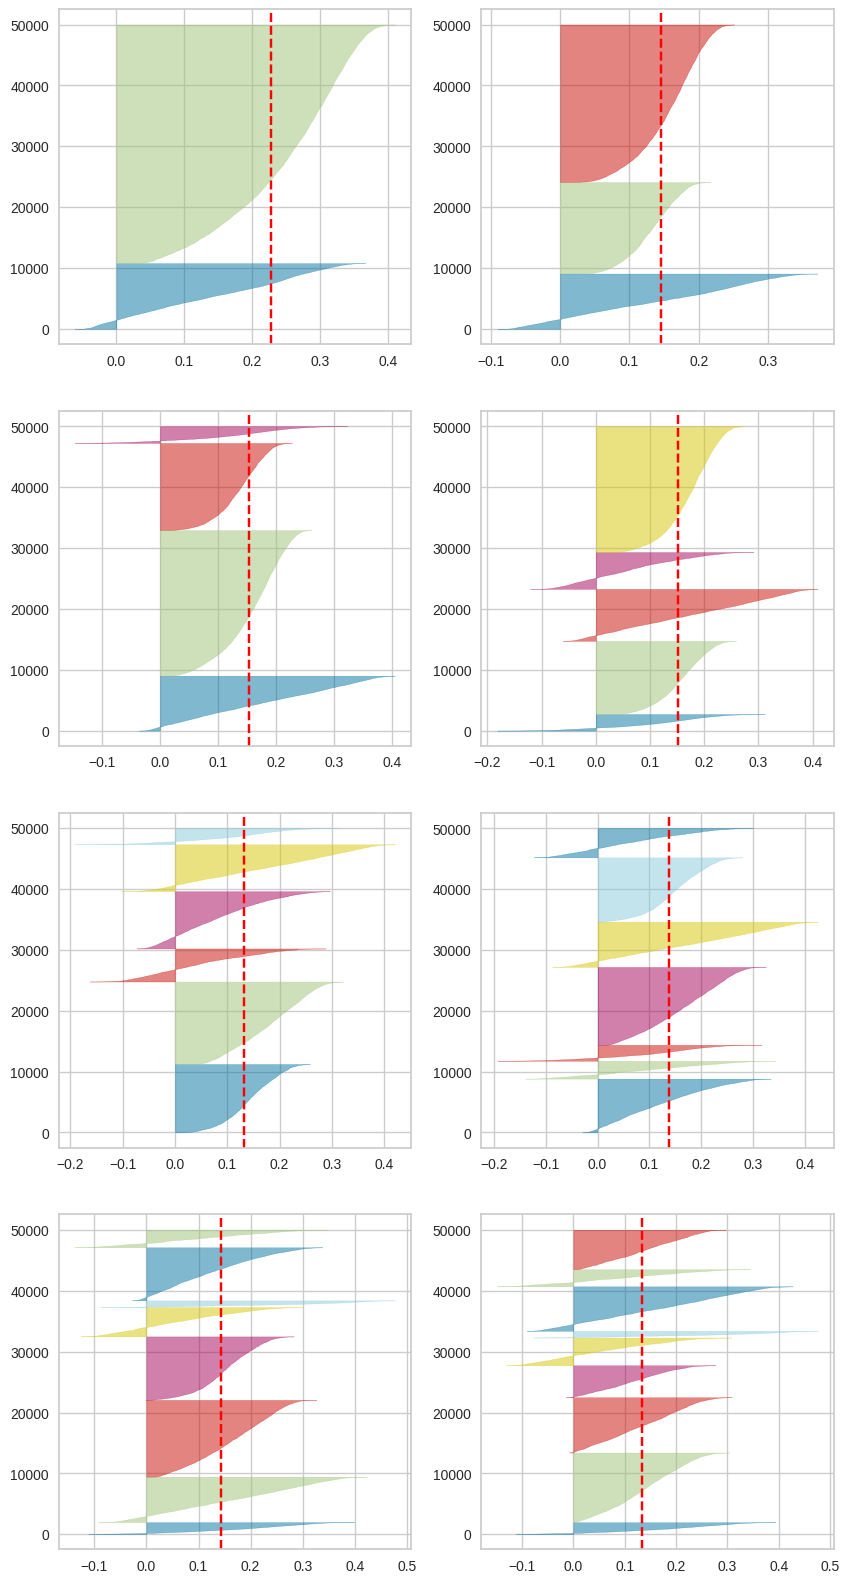

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(10,20))
for i in [2, 3, 4, 5, 6, 7, 8, 9]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_train_sc[cluster_features]) 

In [ ]:
#Create a function to append the cluste label as a feature
km_recommender = KMeans(n_clusters=5, max_iter=100, random_state=1234)
km_recommender.fit(df_train_sc[cluster_features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=100, n_clusters=5, random_state=1234)

In [ ]:
df_train_sc[20] = km_recommender.labels_

In [ ]:
df_train_sc.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
62464,10942,Piano Man,spotify:track:78WVLOP9pN0G3gRLFy1rAa,Piano Man,spotify:album:77ErLrVvYETIlQJHAwhfIH,Billy Joel,spotify:artist:6zFYqv1mOsgBRQbae3JJ9e,336200,9,-1.701024,...,-1.439194,-0.423486,0.719270,-0.678202,1.367625,-0.305335,0.808566,-0.358522,1.989151,1
27405,10421,Tho Freestyle,spotify:track:4qFixB6NCpNqdrtlPKpNQE,Droptopwop,spotify:album:0smWYh2nQsaZNonBGZpZMn,Gucci Mane,spotify:artist:13y7CgLHjMVRMDqxdx0Xdo,160268,213,0.866470,...,0.221834,-0.043798,-1.390299,0.957380,1.328295,-0.305357,1.797486,-0.729887,0.947574,0
30008,10469,Better Together,spotify:track:2iXdwVdzA0KrI2Q0iZNJbX,In Between Dreams,spotify:album:2B9q4KPjOEYu885Keo9dfX,Jack Johnson,spotify:artist:3GBPw9NK25X1Wt2OUvOwY3,207680,1,1.629276,...,-0.055004,-0.608000,0.719270,-0.431964,0.223499,-0.305309,-0.527457,0.701327,-0.397388,2
4881,10078,Lonely Boy,spotify:track:5G1sTBGbZT5o4PNRc75RKI,El Camino,spotify:album:5DLhV9yOvZ7IxVmljMXtNm,The Black Keys,spotify:artist:7mnBLXK823vNxN3UWB7Gfz,193653,21,-1.564587,...,-0.885518,-0.158606,0.719270,-0.273811,-0.827059,-0.254317,-0.581815,0.484350,1.542820,2
48239,10739,I'm the One,spotify:track:3DXncPQOG4VBw3QHh3S817,Grateful,spotify:album:4JBZ0QHveEpESepanNBG8A,DJ Khaled,spotify:artist:0QHgL1lAIqAw0HtD7YldmP,288600,33,0.004437,...,0.498671,0.812619,0.719270,-0.587114,-0.644607,-0.305357,-0.141058,1.335567,-1.402228,2


Let's visualize the distribution of tracks among clusters

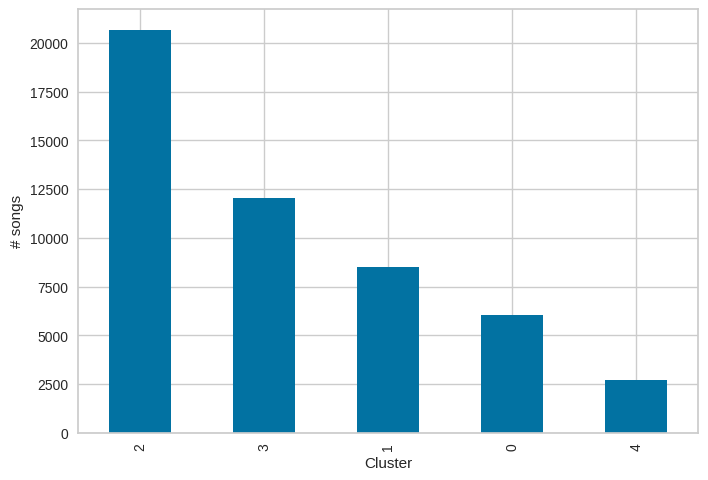

In [ ]:
df_train_sc[20].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('# songs')
#plt.title('Amount of songs per cluster')
plt.show()



Principal component analysis

In [ ]:
pca = PCA(n_components=2, random_state=1234)
tracks_pca = pca.fit_transform(df_train_sc[np.arange(9,20)])
pca.explained_variance_ratio_.sum()


0.37530214984317944

In [ ]:
tracks_pca

array([[ 1.60613056, -2.105761  ],
       [ 0.39575967,  0.66777472],
       [ 0.64457679,  1.6992581 ],
       ...,
       [-0.59593159, -0.00560779],
       [-1.05292512,  0.19958687],
       [-0.95920076, -1.98053786]])

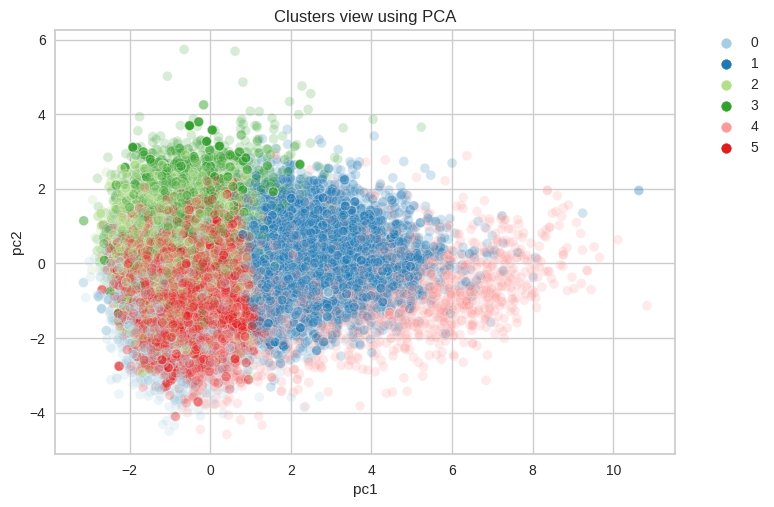

In [ ]:
pca_df = pd.DataFrame(tracks_pca, columns=['pc1', 'pc2'])
pca_df['cluster'] = km.labels_

sns.scatterplot(data=pca_df, x='pc1', y='pc2', hue='cluster', legend="full", palette='Paired', alpha = 0.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Clusters view using PCA')
plt.show()

#consider doing a subsample for a better visualization
# consider adding the t-SNE plot

In [ ]:
# radar plot for a playlist
# https://www.python-graph-gallery.com/390-basic-radar-chart
def radar_playlist(values, categories):
  # Set data

  # number of variable
  N = len(categories)
  
  # We are going to plot the first line of the data frame.
  # But we need to repeat the first value to close the circular graph:
  values=values.tolist()
  values += values[:1]
  values
  
  # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
  angles = [n / float(N) * 2 * np.pi for n in range(N)]
  angles += angles[:1]
  
  # Initialise the spider plot
  ax = plt.subplot(111, polar=True)
  
  # Draw one axe per variable + add labels
  plt.xticks(angles[:-1], categories, color='grey', size=8)
  
  # Draw ylabels
  ax.set_rlabel_position(0)
  plt.yticks([-0.2,-0.4,-0.6,-0.8,0.2,0.4,0.6,0.8,0], ["-0.2","-0.4","-0.6","-0.8","0.2","0.4","0.6","0.8","0"], color="grey", size=8)
  plt.ylim(-1,1)
  
  # Plot data
  ax.plot(angles, values, linewidth=1, linestyle='solid')
  
  # Fill area
  ax.fill(angles, values, 'b', alpha=0.1)

  # Show the graph
  plt.show()

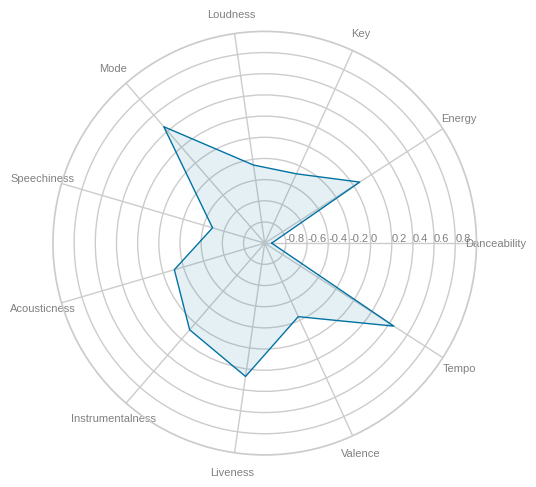

In [ ]:
radar_playlist(df_train_sc[df_train_sc[0]==10942][np.arange(9,20)].mean(), col_names.values())

In [ ]:
# Make predictions based on the clusters
# For every playlist we will analyze the distribution of the tracks in every cluster

In [ ]:
def playlist_cluster_freq(playlist_id, df):
  temp = df[df[0]==playlist_id][20]
  cluster_freq = temp.value_counts()
  cluster_freq = cluster_freq/cluster_freq.sum()
  return cluster_freq



In [ ]:
playlist_cluster_freq(10942, df_train_sc)

3    0.5000
5    0.1875
1    0.1250
6    0.0625
0    0.0625
2    0.0625
Name: 20, dtype: float64

In [ ]:
np.unique(km_recommender.predict(df_test[cluster_features]))

array([0, 1, 2, 4], dtype=int32)

In [ ]:
df_train_sc[20].unique()

array([4, 0, 1, 2, 3], dtype=int32)